# Linear Regression with Gradient Descent


### Prologue

Before getting started let me briefly describe a few of the libraries we will be using.

* Pandas: Data Science Library
* Numpy: Scientific library which provides the core functionality of pandas.
* Matplotlib: Data visualization library (Note: inline is used to render plots in the notebook.
* Seaborn: Data visualization library with an amazing variety of plots.

In [65]:
import pandas as pd
import numpy as np

## Exploratory plot

Next we will first load our data into a DataFrame and plot it to get our head around the data we will be workign with.

In [66]:
# Read in the csv file and setting the column names to profit and population
data = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


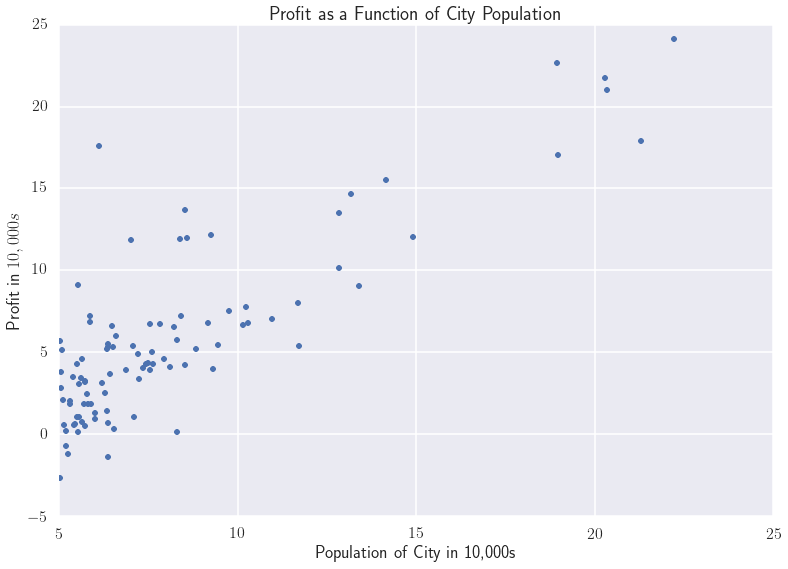

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")
sns.set_context("poster") # slightly larger than the norm
fig, ax = plt.subplots()
ax.plot(data['population'], data['profit'], '.')
ax.set_title('Profit as a Function of City Population')
ax.set(ylim=(-5, 25))
ax.set(xlim=(5, 25))
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')

We can readily see from the data that the cities profit increases linearly as the population increases. So it appears that the appropriate hypothesis is:

$$ h_{\theta}(x) = \theta_0 + \theta x $$

## Constructing the cost function

We will use a squared error cost function to measure how good of a fit our hypothesis is to the sample data.

$$J(\theta) = \frac{1}{2m}\sum{(h_{\theta}(x^{(i)}) - y^{(i)})^2} $$

In particular we will use the matrix form of the cost function below:

$$ J(\theta) = \frac{1}{2m}\vec{o}^{T}[(X\vec{\theta}-\vec{y})^2] $$


## Using the GradientDescent class to minimize the cost function

In [68]:
class GradientDescent:
    def __init__(self):
        """ Initialize gradient descent"""
        self.cost_history = pd.DataFrame({'cost':[]})
        self.thetas = pd.DataFrame()

    @staticmethod
    def cost(X, y, theta):
        """ Calculates the cost function given the design matrix (X), target vector (y), and theta vector (theta).

        Args:
            X (DataFrame): The design matrix
            y (DataFrame): The target vector
            theta (DataFrame): The theta vector

        Returns:
            np.Array: the calculated squared error cost
        """
        m = len(y)
        # Matlab Equivalent: (X*theta - y).^2
        error_squared = (np.dot(X, theta)-y)**2
        # Matlab Equivalent: ones(1,m)*errorSquared
        cost = np.dot(np.ones(m), error_squared)/(2*m)
        return cost[0]

    @staticmethod
    def update_theta(theta, alpha, m, X, y):
        """ Performs a single theta update for gradient descent.

        Args:
            theta (DataFrame): The theta vector
            alpha (int): The learning rate
            m (int): The learning rate
            X (DataFrame): The design matrix
            y (DataFrame): The target vector

        Returns:
            DataFrame: The update thetas
        """
        # Matlab Equivalent: t - (alpha/m)*X.'*(X*t - y)
        return theta - alpha*np.dot(X.T, (np.dot(X, theta)-y))/m

    def monitor(self, X, y, theta, alpha=0.01, iterations=1500):
        """ Iterates through gradient descent given the design matrix (x), target vector (y), theta vector (theta),
        and optional alpha (default: 0.01), and iterations (default: 1500).

        Args:
            X (DataFrame): The design matrix
            y (DataFrame): The target vector
            theta (DataFrame): The theta vector
            alpha (int): The learning rate (Default: 0.01)
            iterations (int): The number of iterations (Default: 1500)
        """
        self.cost_history = None
        m = len(y)
        t = theta
        for i in range(iterations):
            t = GradientDescent.update_theta(t, alpha, m, X, y)
            cost = GradientDescent.cost(X, y, t)
            self.cost_history.append(cost)
            yield cost

        self.thetas = t

    def minimize(self, X, y, theta, alpha=0.01, iterations=1500):
        """ Performs gradient descent given the design matrix (x), target vector (y), theta vector (theta).

        Args:
            X (DataFrame): The design matrix
            y (DataFrame): The target vector
            theta (DataFrame): The theta vector
            alpha (int): The learning rate (Default: 0.01)
            iterations (int): The number of iterations (Default: 1500)

        Returns:
            DataFrame: The thetas for the minimized cost function.
        """
        self.cost_history = None
        history = []
        m = len(y)
        t = theta
        for i in range(iterations):
            t = GradientDescent.update_theta(t, alpha, m, X, y)
            history.append(GradientDescent.cost(X, y, t))

        self.cost_history = pd.DataFrame({'cost': history})
        return t

In [69]:
m = data.shape[0]
X = pd.DataFrame({'x0' : np.ones(m), 'x1': data['population']})
y = pd.DataFrame({'y' : data['profit']})
theta = pd.DataFrame({'theta' : [0, 1]})

In [70]:
gd = GradientDescent()
theta = gd.minimize(X, y, theta)

The thetas that best fit the data are:

In [71]:
theta

,theta
0,-3.636933
1,1.167030


## Evaluate the Learning Rate

From the cost per iteration graph it can easily be seen that the gradient descent converges in just under 1500 iterations. Thus the chose alpha is acceptable.

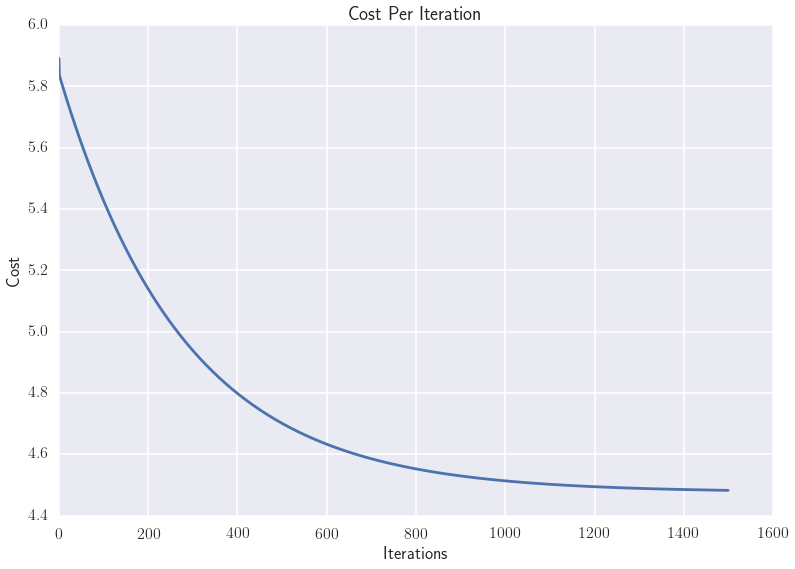

In [72]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
ax.plot(gd.cost_history.index, gd.cost_history['cost'])
ax.set_title('Cost Per Iteration')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

In [73]:
x_min = int(X['x1'].min())
x_max = int(X['x1'].max())
hypothesis = [theta.iloc[0][0] + x*theta.iloc[1][0] for x in range(x_min, x_max+2)]

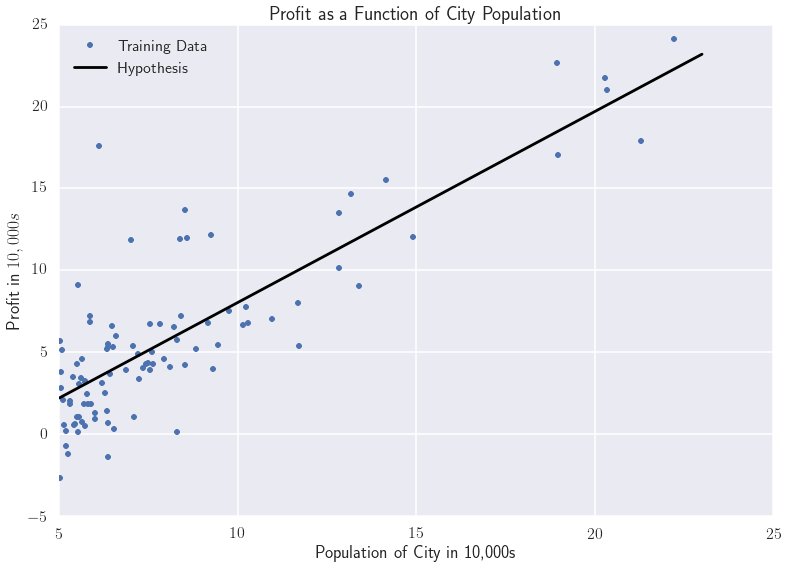

In [74]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
ax.plot(X['x1'], y, '.', label = 'data')
ax.plot([i for i in range(x_min, x_max+2)], hypothesis, 'k-', label = 'hypothesis')
ax.set_xlabel('Population of City in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Profit as a Function of City Population')
ax.legend(['Training Data', 'Hypothesis'], loc='best')

## Visualizing the Cost Function 

To visualize the cost function two plots will be used. Both will range between (-10, 10) for theta 0, and (-1, 4) for theta 1. 

In [75]:
theta_zero = np.linspace(-10, 10, 100)
theta_one = np.linspace(-1, 4, 100)
j_vals = np.zeros((theta_zero.size, theta_one.size))

# Filling a 100x100 matrix with 
cost_points = np.empty([theta_zero.size, theta_one.size])
for i, t0 in enumerate(theta_zero):
    for j, t1 in enumerate(theta_one):
        ## revesed so that when transformed into a data frame rows and columns are represented properly
        cost_points[j][i] = GradientDescent.cost(X, y, pd.DataFrame([t0, t1]))

cost = pd.DataFrame(cost_points)

## Cost Function: Surface Plot

__Note:__ Theta has been plotted as well.

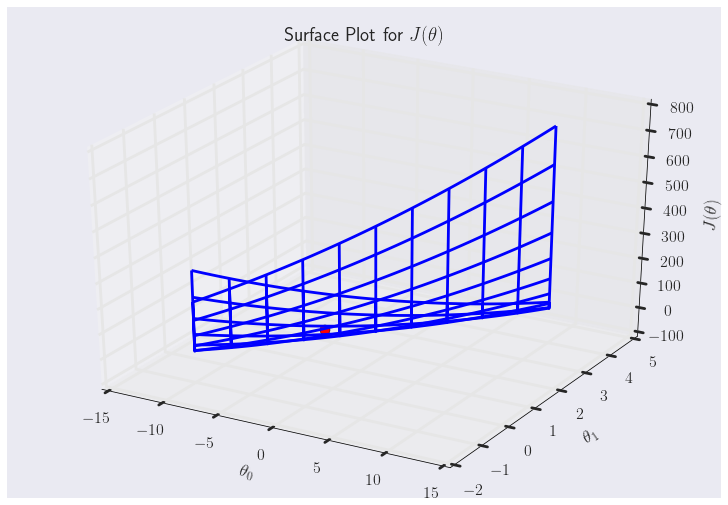

In [76]:
import mpl_toolkits.mplot3d as Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rc('text', usetex=True)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(theta.iloc[0], theta.iloc[1], [GradientDescent.cost(X, y, theta)], marker='o', s=100, c='r')
ax.plot_wireframe(theta_zero, theta_one, cost, rstride=10, cstride=10, cmap=cm.jet)
ax.set_title(r'Surface Plot for $J(\theta)$')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

# Cost Function Contour Plot

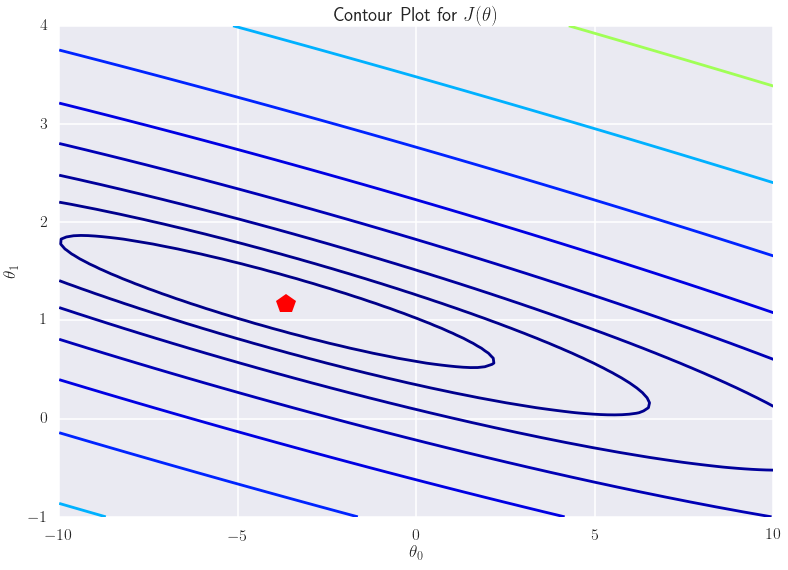

In [77]:
fig, ax = plt.subplots()
ax.contour(theta_zero, theta_one, cost, np.logspace(-2, 3, 20), cmap=cm.jet)
ax.set_title(r'Contour Plot for $J(\theta)$')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.plot(theta.iloc[0], theta.iloc[1], marker='p', markersize=20, color='r')


When comparing the survace and contour plot it is easy to see that locating the global minimum is easier on the contour plot. 